# Downloading the dataset

In [1]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip /content/drive/MyDrive/Mask3Cat.zip -d /content/drive/MyDrive/

Archive:  /content/drive/MyDrive/Mask3Cat.zip
   creating: /content/drive/MyDrive/Mask3Cat/train/
   creating: /content/drive/MyDrive/Mask3Cat/train/mask/
  inflating: /content/drive/MyDrive/Mask3Cat/train/mask/mask (1).jpg  
  inflating: /content/drive/MyDrive/Mask3Cat/train/mask/mask (10).jpg  
  inflating: /content/drive/MyDrive/Mask3Cat/train/mask/mask (100).jpg  
  inflating: /content/drive/MyDrive/Mask3Cat/train/mask/mask (101).jpg  
  inflating: /content/drive/MyDrive/Mask3Cat/train/mask/mask (102).jpg  
  inflating: /content/drive/MyDrive/Mask3Cat/train/mask/mask (103).jpg  
  inflating: /content/drive/MyDrive/Mask3Cat/train/mask/mask (104).jpg  
  inflating: /content/drive/MyDrive/Mask3Cat/train/mask/mask (105).jpg  
  inflating: /content/drive/MyDrive/Mask3Cat/train/mask/mask (106).jpg  
  inflating: /content/drive/MyDrive/Mask3Cat/train/mask/mask (107).jpg  
  inflating: /content/drive/MyDrive/Mask3Cat/train/mask/mask (108).jpg  
  inflating: /content/drive/MyDrive/Mask3Cat/

# loading the libraries

In [4]:
# import the necessary libraries
import os
import cv2
import keras
import numpy as np
import pandas as pd 
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from IPython.display import Image

# Train your own model with your own choice of parameters, and pretrained model 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, MobileNet, InceptionResNetV2
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,LeakyReLU

# Preparing the dataset

In [5]:
X_train = []
X_test = []
y_train = []
y_test = []

for folder in os.listdir("/content/drive/MyDrive/Mask3Cat/train"):
  for img_path in os.listdir("/content/drive/MyDrive/Mask3Cat/train/" + folder):
      image = cv2.imread(os.path.join("/content/drive/MyDrive/Mask3Cat/train/" + folder, img_path))
      resized = cv2.resize(image, (64, 64)) / 255
      X_train.append(resized)
      y_train.append(folder)

for folder in os.listdir("/content/drive/MyDrive/Mask3Cat/val"):
  for img_path in os.listdir("/content/drive/MyDrive/Mask3Cat/val/" + folder):
      image = cv2.imread(os.path.join("/content/drive/MyDrive/Mask3Cat/val/" + folder, img_path))
      resized = cv2.resize(image, (64, 64)) / 255
      X_test.append(resized)
      y_test.append(folder)

In [6]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [7]:
idx = np.random.permutation(len(X_train))
X_train, y_train = X_train[idx], y_train[idx]

idx = np.random.permutation(len(X_test))
X_test, y_test = X_test[idx], y_test[idx]

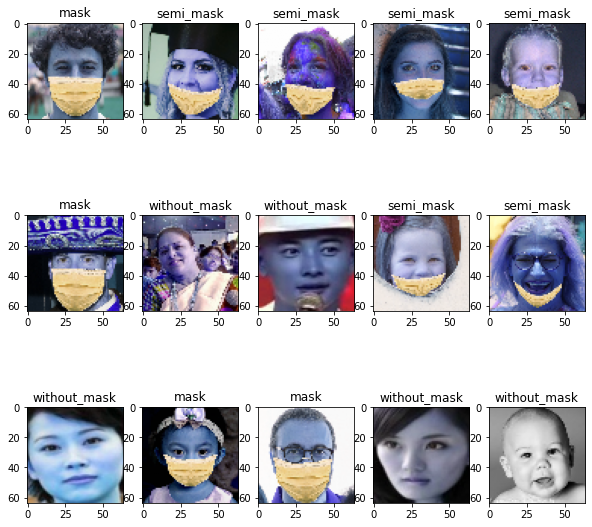

In [8]:
# plot random 5 images in your dataset with their labels
import random
names = random.choices(range(len(X_train)), k=15)
plt.figure(figsize = (10,10))
for n, name in enumerate(names):
  plt.subplot(3, 5, n+1)
  plt.title(y_train[name])
  plt.imshow(X_train[name])

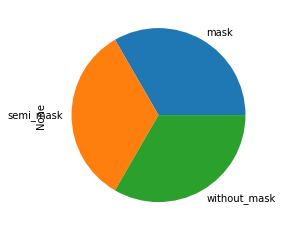

In [9]:
pd.Series(y_train).value_counts().plot(kind='pie')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

y_train_cat = to_categorical(y_train_le)
y_test_cat = to_categorical(y_test_le)

# Applying CNN

In [11]:
cnn_model = Sequential()
cnn_model.add(Conv2D(16, kernel_size=(3, 3),activation='linear',input_shape=(64,64,3),padding='same'))
cnn_model.add(MaxPooling2D((2, 2),padding='same'))
cnn_model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='linear'))                
cnn_model.add(Dense(3, activation='softmax'))
cnn_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                5

Epoch 1/10
270/270 [==============================] - 12s 5ms/step - loss: 0.2647 - accuracy: 0.9198 - val_loss: 0.0785 - val_accuracy: 0.9556
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0572 - accuracy: 0.9781 - val_loss: 0.0967 - val_accuracy: 0.9667
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0649 - accuracy: 0.9774 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0170 - accuracy: 0.9952 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0267 - accuracy: 0.9933 - val_loss: 0.0764 - val_accuracy: 0.9778
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0180 - accuracy: 0.9937 - val_loss: 0.0552 - val_accuracy: 0.9889
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0080 - accuracy: 0.9985 - val_loss: 0.0581 - val_accuracy: 0.9889
Epoch

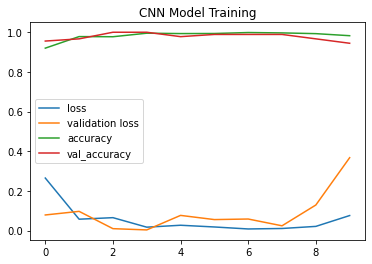

In [12]:
# Training the models
model_epochs = 10
cnn_history = cnn_model.fit(np.array(X_train),
                y_train_cat,
                epochs = model_epochs,
                validation_data=(np.array(X_test), y_test_cat),
                batch_size=10)

plt.plot(range(model_epochs),cnn_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),cnn_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),cnn_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),cnn_history.history['val_accuracy'], label = "val_accuracy")
plt.title("CNN Model Training")
plt.legend()
plt.show()

# Transfer Learning

## VGG 16

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

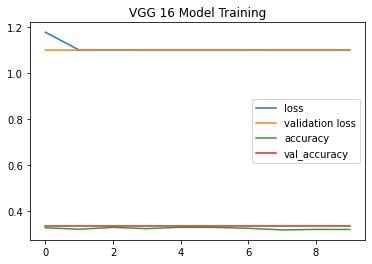

In [13]:
vgg16_model = VGG16(include_top=False,    input_shape=(64, 64, 3))

# Adding last layer into the vgg16 model
flat = Flatten()(vgg16_model.layers[-1].output)
classl = Dense(100, activation='relu')(flat)
class2 = Dense(10, activation='relu')(classl)
output = Dense(3, activation='softmax')(class2)
vgg16_model = Model(inputs=vgg16_model.inputs, outputs=output)
vgg16_model.compile(optimizer = 'adam',
                    loss = 'categorical_crossentropy',
                    metrics=['accuracy'])

vgg16_model.summary()

# Training the models
vgg16_history = vgg16_model.fit(np.array(X_train),
                y_train_cat,
                epochs = model_epochs,
                validation_data=(np.array(X_test), y_test_cat),
                batch_size=10)

plt.plot(range(model_epochs),vgg16_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),vgg16_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),vgg16_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),vgg16_history.history['val_accuracy'], label = "val_accuracy")
plt.title("VGG 16 Model Training")
plt.legend()
plt.show()

## VGG 19

80150528/80134624 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                            

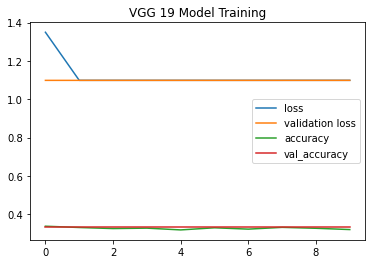

In [14]:
vgg19_model = VGG19(include_top=False,    input_shape=(64, 64, 3))

# Adding last layer into the vgg19 model
flat = Flatten()(vgg19_model.layers[-1].output)
classl = Dense(100, activation='relu')(flat)
class2 = Dense(10, activation='relu')(classl)
output = Dense(3, activation='softmax')(class2)
vgg19_model = Model(inputs=vgg19_model.inputs, outputs=output)
vgg19_model.compile(optimizer = 'adam',
                    loss = 'categorical_crossentropy',
                    metrics=['accuracy'])

vgg19_model.summary()

vgg19_history = vgg19_model.fit(np.array(X_train),
                y_train_cat,
                epochs = model_epochs,
                validation_data=(np.array(X_test), y_test_cat),
                batch_size=10)

plt.plot(range(model_epochs),vgg19_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),vgg19_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),vgg19_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),vgg19_history.history['val_accuracy'], label = "val_accuracy")
plt.title("VGG 19 Model Training")
plt.legend()
plt.show()

## Inception Resnet v2

219070464/219055592 [==============================] - 3s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 37, 37, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d_2[0][0]']               
 alization)                                                                                       
                                                                                                  
 activation (Activation) 

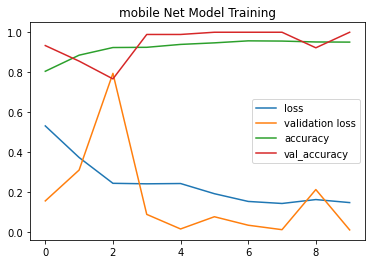

In [15]:
inception_resnet = InceptionResNetV2(include_top=False, input_shape=(75, 75, 3))

# Adding last layer into the vgg16 model
flat = Flatten()(inception_resnet.layers[-1].output)
classl = Dense(100, activation='relu')(flat)
classl = Dropout(0.8)(classl)
class2 = Dense(10, activation='relu')(classl)
output = Dense(3, activation='softmax')(class2)

inception_resnet = Model(inputs=inception_resnet.inputs, outputs=output)
inception_resnet.compile(optimizer = 'adam',
                    loss = 'categorical_crossentropy',
                    metrics=['accuracy'])

inception_resnet.summary()

X_train_inc = [cv2.resize(i, (75,75)) for i in X_train]
X_test_inc = [cv2.resize(i, (75,75))  for i in X_test]

# Training the models
inception_resnet_history = inception_resnet.fit(np.array(X_train_inc),
                y_train_cat,
                epochs = model_epochs,
                validation_data=(np.array(X_test_inc), y_test_cat),
                batch_size=10)

plt.plot(range(model_epochs),inception_resnet_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),inception_resnet_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),inception_resnet_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),inception_resnet_history.history['val_accuracy'], label = "val_accuracy")
plt.title("mobile Net Model Training")
plt.legend()
plt.show()

# ANN Classifier

In [16]:
X_train_flatten = np.array([i.flatten() for i in X_train])
X_test_flatten = np.array([i.flatten() for i in X_test])

In [17]:
print("train data shape:" ,X_train_flatten.shape)
print("test data shape:", X_test_flatten.shape)

train data shape: (2694, 12288)
test data shape: (90, 12288)


In [20]:
ann = Sequential()

ann.add(Dense(32, 'relu',input_dim=X_train_flatten.shape[1]))
ann.add(Dense(3, activation='softmax'))

ann.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                393248    
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 393,347
Trainable params: 393,347
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
270/270 [==============================] - 1s 4ms/step - loss: 0.5561 - accuracy: 0.7743 - val_loss: 0.4236 - val_accuracy: 0.8000
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2308 - accuracy: 0.9369 - val_loss: 0.2052 - val_accuracy: 0.9222
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1621 - accuracy: 0.9506 - val_loss: 0.1330 - val_accuracy: 0.9667
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.0996 - accuracy: 0.9722 - val_loss: 0.1304 - val_accuracy: 0.9556
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.0839 - accuracy: 0.9766 - val_loss: 0.1346 - val_accuracy: 0.9333
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9759 - val_loss: 0.0629 - val_accuracy: 0.9889
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9818 - val_loss: 0.3975 - val_accuracy: 0.8333
Epoch 

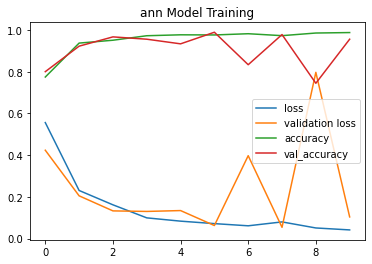

In [21]:
ann_history =  ann.fit(X_train_flatten, y_train_cat,
                epochs = model_epochs,
                validation_data=(X_test_flatten, y_test_cat),
                batch_size=10)

plt.plot(range(model_epochs),ann_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),ann_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),ann_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),ann_history.history['val_accuracy'], label = "val_accuracy")
plt.title("ann Model Training")
plt.legend()
plt.show()

# CNN + MLP

In [33]:
# The CNN
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='linear',input_shape=(64,64,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())

# The MLP 
model.add(Dense(8, activation='linear'))             
model.add(Dense(4, 'relu'))  
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_207 (Conv2D)         (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_208 (Conv2D)         (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_18 (Dense)            (None, 8)                

Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0.3346 - accuracy: 0.8385 - val_loss: 0.0676 - val_accuracy: 0.9778
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0799 - accuracy: 0.9714 - val_loss: 0.0449 - val_accuracy: 0.9778
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0498 - accuracy: 0.9840 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0230 - accuracy: 0.9922 - val_loss: 0.0309 - val_accuracy: 0.9889
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0354 - accuracy: 0.9859 - val_loss: 0.0162 - val_accuracy: 0.9889
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0481 - accuracy: 0.9829 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 

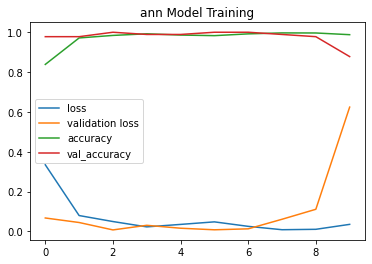

In [34]:
cnn_mlp_history =  model.fit(X_train, y_train_cat,
                    epochs = model_epochs,
                    validation_data=(X_test, y_test_cat),
                    batch_size=10)

plt.plot(range(model_epochs),cnn_mlp_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),cnn_mlp_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),cnn_mlp_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),cnn_mlp_history.history['val_accuracy'], label = "val_accuracy")
plt.title("ann Model Training")
plt.legend()
plt.show()

# Models Comparisons

In [35]:
# For Model Evaluation
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

========== VGG-16 ==========

Accuracy on validation set: 0.3333

Classification report : 
               precision    recall  f1-score   support

           0       0.33      1.00      0.50        30
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        30

    accuracy                           0.33        90
   macro avg       0.11      0.33      0.17        90
weighted avg       0.11      0.33      0.17        90


Confusion Matrix : 
 [[30  0  0]
 [30  0  0]
 [30  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


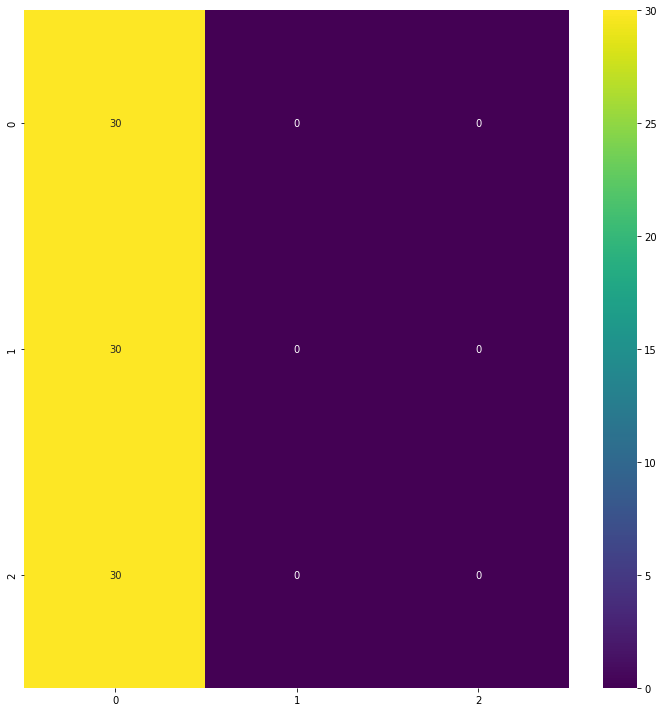

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

========== VGG-19 ==========

Accuracy on validation set: 0.3333

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.33      1.00      0.50        30
           2       0.00      0.00      0.00        30

    accuracy                           0.33        90
   macro avg       0.11      0.33      0.17        90
weighted avg       0.11      0.33      0.17        90


Confusion Matrix : 
 [[ 0 30  0]
 [ 0 30  0]
 [ 0 30  0]]


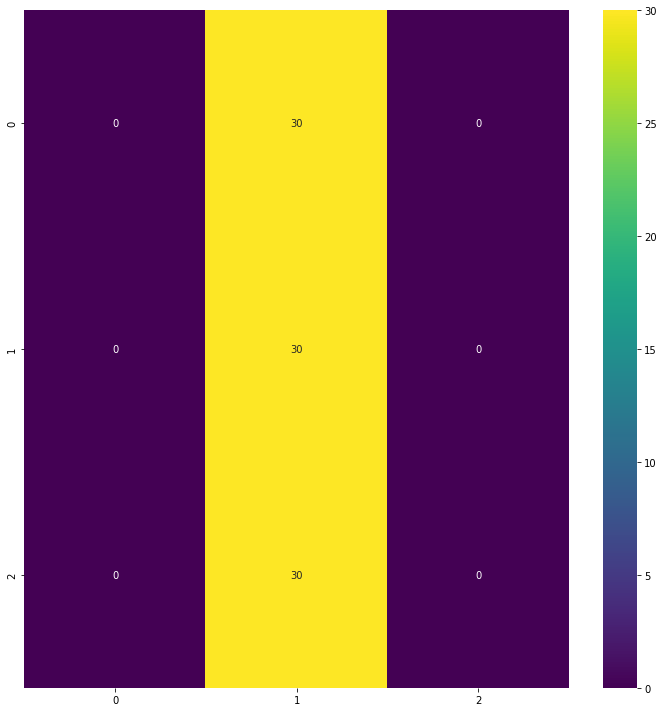

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== inception resnet ==========

Accuracy on validation set: 1.0000

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90


Confusion Matrix : 
 [[30  0  0]
 [ 0 30  0]
 [ 0  0 30]]


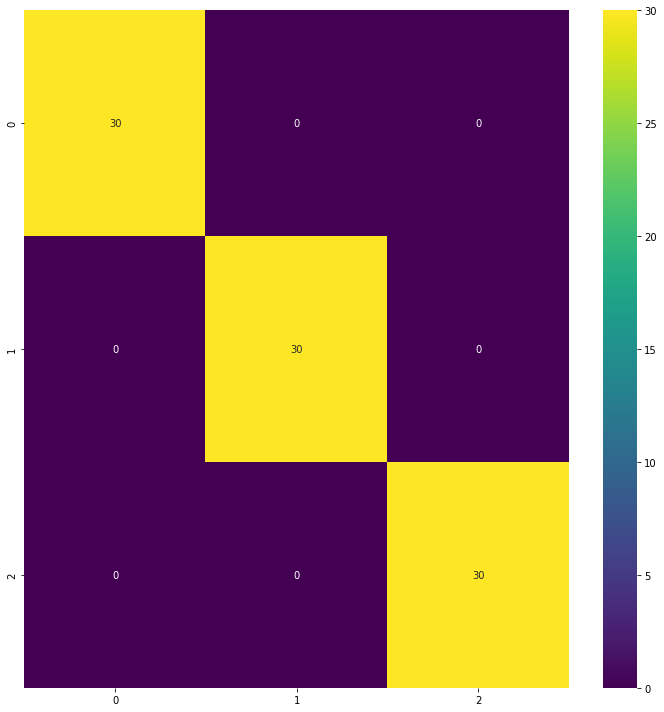

========== CNN Model ==========

Accuracy on validation set: 0.9444

Classification report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      0.83      0.91        30
           2       1.00      1.00      1.00        30

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90


Confusion Matrix : 
 [[30  0  0]
 [ 5 25  0]
 [ 0  0 30]]


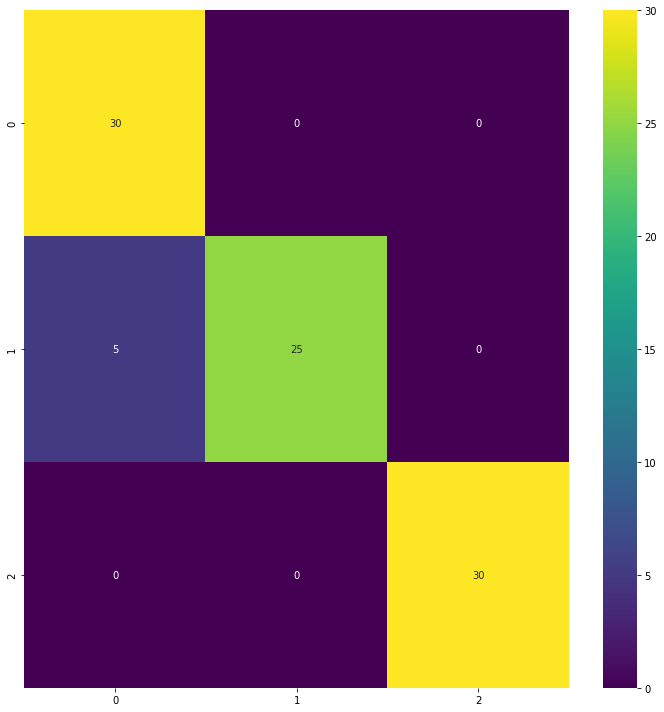

========== ANN ==========

Accuracy on validation set: 0.9556

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.93      0.93      0.93        30
           2       0.94      1.00      0.97        30

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90


Confusion Matrix : 
 [[28  2  0]
 [ 0 28  2]
 [ 0  0 30]]


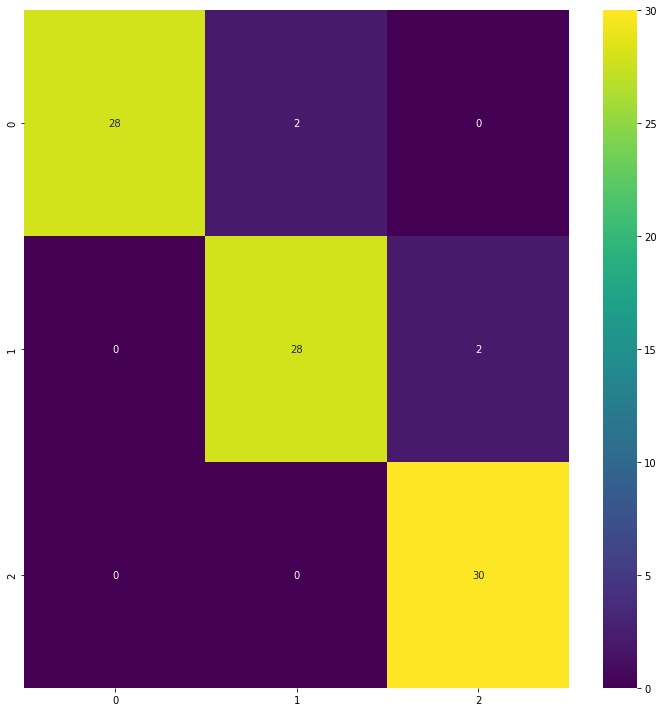

========== CNN + MLP ==========

Accuracy on validation set: 0.8778

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        30
           1       0.81      0.83      0.82        30
           2       0.86      1.00      0.92        30

    accuracy                           0.88        90
   macro avg       0.89      0.88      0.88        90
weighted avg       0.89      0.88      0.88        90


Confusion Matrix : 
 [[24  6  0]
 [ 0 25  5]
 [ 0  0 30]]


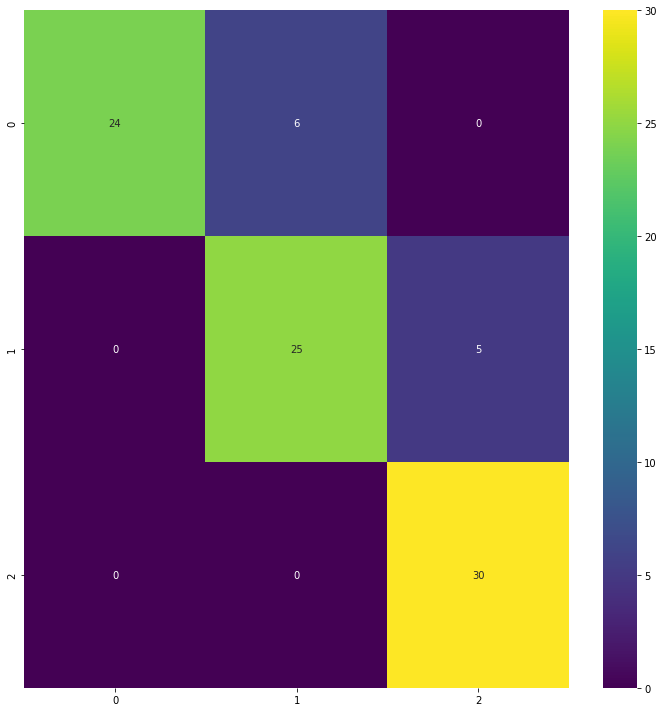

In [36]:
predictions = [np.argmax(i) for i in vgg16_model.predict(np.array(X_test))]
y_actual = [np.argmax(i) for i in y_test_cat]
vgg16_result = modelEvaluation(predictions, y_actual, "VGG-16")

predictions = [np.argmax(i) for i in vgg19_model.predict(np.array(X_test))]
y_actual = [np.argmax(i) for i in y_test_cat]
vgg19_result = modelEvaluation(predictions, y_actual, "VGG-19")

predictions = [np.argmax(i) for i in inception_resnet.predict(np.array(X_test_inc))]
y_actual = [np.argmax(i) for i in y_test_cat]
inception_result = modelEvaluation(predictions, y_actual, "inception resnet")

predictions = [np.argmax(i) for i in cnn_model.predict(np.array(X_test))]
y_actual = [np.argmax(i) for i in y_test_cat]
CNN_result = modelEvaluation(predictions, y_actual, "CNN Model")

predictions = [np.argmax(i) for i in ann.predict(X_test_flatten)]
y_actual = [np.argmax(i) for i in y_test_cat]
ann_result = modelEvaluation(predictions, y_actual, "ANN")

predictions = [np.argmax(i) for i in model.predict(X_test)]
y_actual = [np.argmax(i) for i in y_test_cat]
cnn_mlp_result = modelEvaluation(predictions, y_actual, "CNN + MLP")

In [37]:
from tabulate import tabulate
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'CNN' : CNN_result,
    'VGG-16' : vgg16_result,
    'VGG-19' : vgg19_result,
    'Inception Resnet v2': inception_result,
    'ANN': ann_result,
    'CNN + MLP':cnn_mlp_result
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+-----------+----------+----------+----------+-----------------------+----------+-------------+
| Metrics   |      CNN |   VGG-16 |   VGG-19 |   Inception Resnet v2 |      ANN |   CNN + MLP |
|-----------+----------+----------+----------+-----------------------+----------+-------------|
| accuracy  | 0.944444 | 0.333333 | 0.333333 |                     1 | 0.955556 |    0.877778 |
| precision | 0.952381 | 0.111111 | 0.111111 |                     1 | 0.956944 |    0.887865 |
| recall    | 0.944444 | 0.333333 | 0.333333 |                     1 | 0.955556 |    0.877778 |
| f1-score  | 0.944056 | 0.166667 | 0.166667 |                     1 | 0.955531 |    0.877213 |
+-----------+----------+----------+----------+-----------------------+----------+-------------+


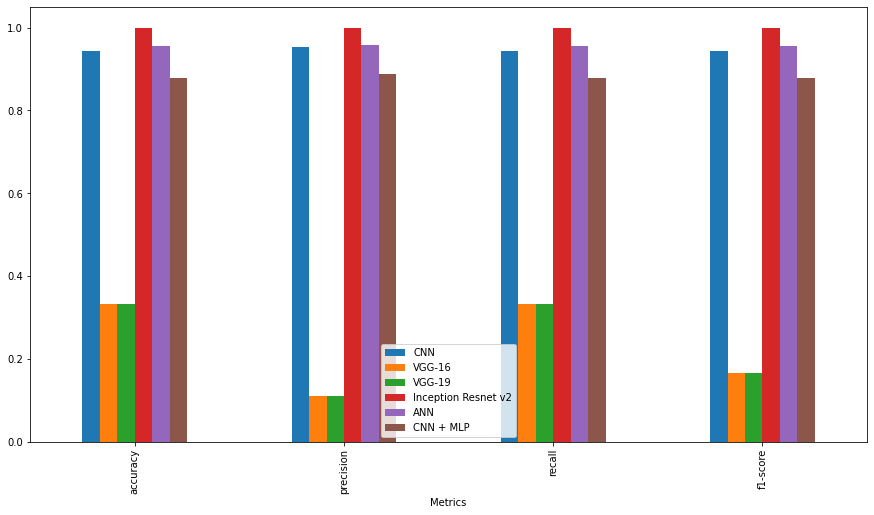

In [38]:
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

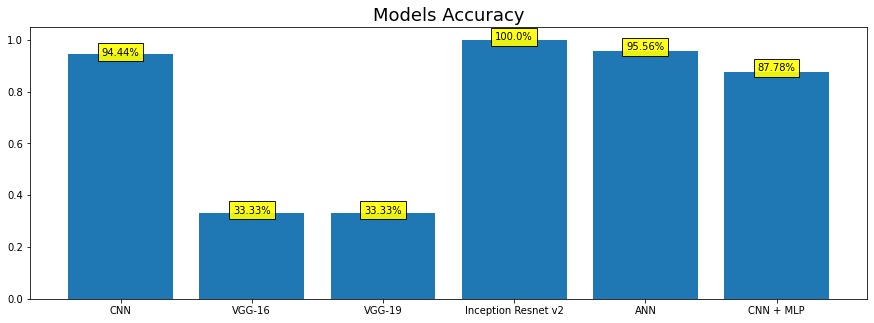

In [39]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i]*100,2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

# 1st Paper
**Information about paper**

Dataset:
1. SMFD (Simulated Masked Face Dataset )
2. LFW (Labeled Faces in the Wild)
3. RMFD (Real-World Masked Face Dataset)

**WorkFlow**

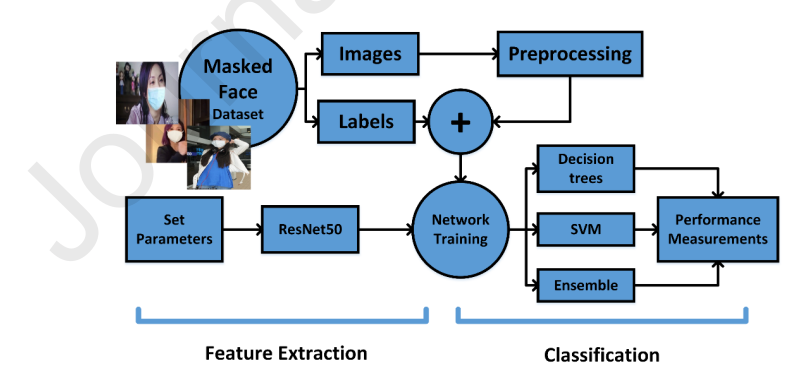

**Results**
1. SVM 
* SMFD 99.49%
* LFW 100%
* RMFD 99.64

2. Decision Tree
* RMFD 99.64%
* LFW 93.44%
* SMFD 94.54

3. Ensemble Classifier
* RMFD 
* LFW 99.64%
* SMFD 

In [ ]:
resnet = ResNet50(include_top=False, input_shape=(64, 64, 3))

# Adding last layer into the resnet model
flat = Flatten()(resnet.layers[-1].output)
layer = Dense(100, activation='relu')(flat)
layer = Dense(10, activation='relu')(layer)
output = Dense(3, activation='softmax')(layer)

# Resnet Model
resnet = Model(inputs=resnet.inputs, outputs=output)
resnet.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

# Training the models
resnet_history = resnet.fit(np.array(X_train),
                y_train_cat,
                epochs = 5,
                validation_data=(np.array(X_test), y_test_cat),
                batch_size=10)

Epoch 1/5
270/270 [==============================] - 18s 45ms/step - loss: 0.2776 - accuracy: 0.9076 - val_loss: 1.8685 - val_accuracy: 0.3333
Epoch 2/5
270/270 [==============================] - 11s 41ms/step - loss: 0.0938 - accuracy: 0.9755 - val_loss: 4.1277 - val_accuracy: 0.3333
Epoch 3/5
270/270 [==============================] - 11s 41ms/step - loss: 0.0914 - accuracy: 0.9781 - val_loss: 8.3519 - val_accuracy: 0.3667
Epoch 4/5
270/270 [==============================] - 11s 41ms/step - loss: 0.0905 - accuracy: 0.9770 - val_loss: 0.1363 - val_accuracy: 0.9333
Epoch 5/5
270/270 [==============================] - 11s 41ms/step - loss: 0.1097 - accuracy: 0.9718 - val_loss: 0.0178 - val_accuracy: 1.0000


In [ ]:
tmp_model = Model(resnet.layers[0].input, resnet.layers[-2].output)
new_train_features = []
new_test_features = []

for i in X_train:
  pred = tmp_model.predict(np.expand_dims(i, axis=0))[0]
  new_train_features.append(pred.tolist())

for i in X_test:
  pred = tmp_model.predict(np.expand_dims(i, axis=0))[0]
  new_test_features.append(pred.tolist())

In [ ]:
new_train_features = np.array(new_train_features)
new_test_features = np.array(new_test_features)

## **Applying Machine Learning models**

**Decision tree Classifier**

========== Decision tree Classifier Results ==========

Accuracy on validation set: 0.9889

Classification report : 
               precision    recall  f1-score   support

        mask       1.00      0.97      0.98        30
   semi_mask       0.97      1.00      0.98        30
without_mask       1.00      1.00      1.00        30

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90


Confusion Matrix : 
 [[29  1  0]
 [ 0 30  0]
 [ 0  0 30]]


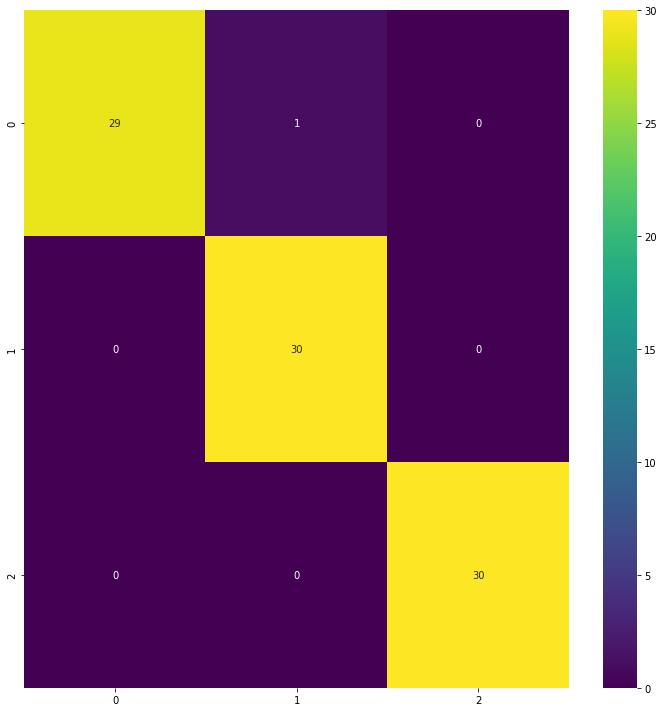

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(new_train_features, y_train)
pred = dtc.predict(new_test_features)
dtc_result = modelEvaluation(pred, y_test, "Decision tree Classifier Results")

========== SVC Results ==========

Accuracy on validation set: 0.9778

Classification report : 
               precision    recall  f1-score   support

        mask       1.00      0.93      0.97        30
   semi_mask       0.94      1.00      0.97        30
without_mask       1.00      1.00      1.00        30

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90


Confusion Matrix : 
 [[28  2  0]
 [ 0 30  0]
 [ 0  0 30]]


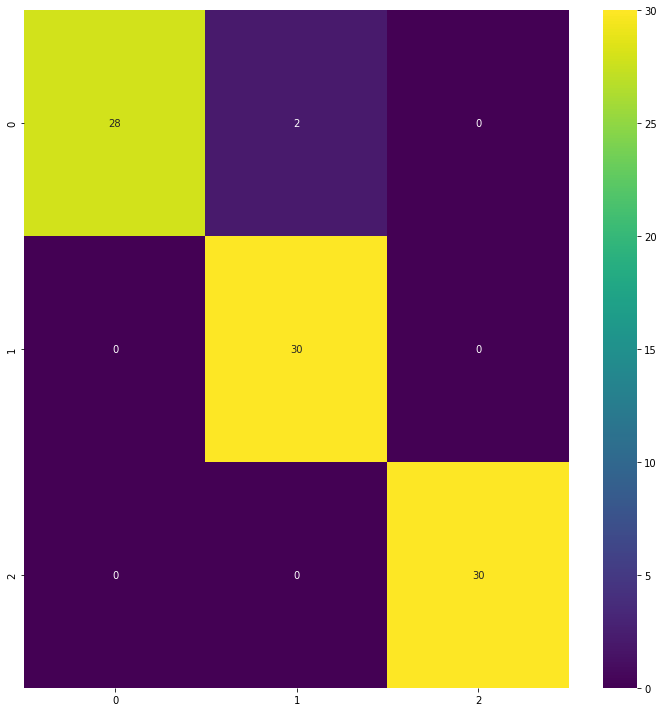

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(new_train_features, y_train)
pred = svc.predict(new_test_features)
svc_result = modelEvaluation(pred, y_test, "SVC Results")

**Ensemble**

========== Voting Classifier Results ==========

Accuracy on validation set: 0.9889

Classification report : 
               precision    recall  f1-score   support

        mask       1.00      0.97      0.98        30
   semi_mask       0.97      1.00      0.98        30
without_mask       1.00      1.00      1.00        30

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90


Confusion Matrix : 
 [[29  1  0]
 [ 0 30  0]
 [ 0  0 30]]


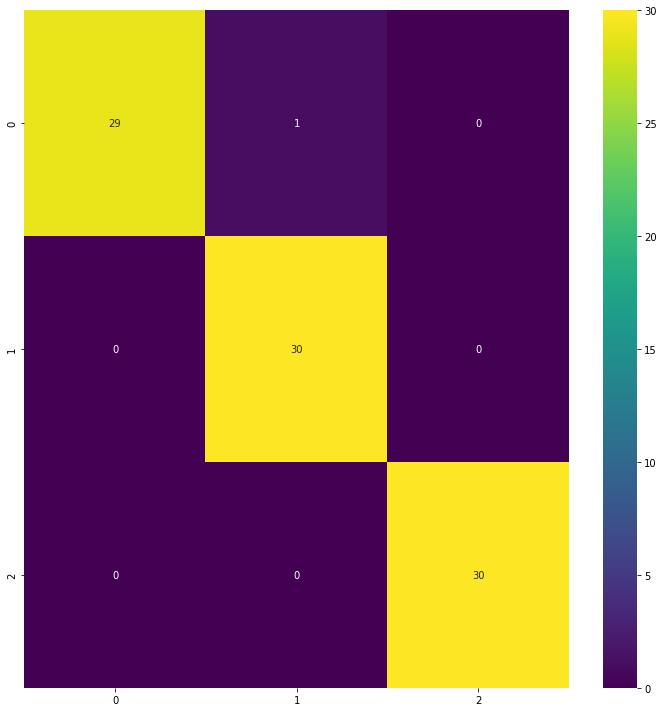

In [ ]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('dt', dtc), ('svc', svc)])
vc.fit(new_train_features, y_train)
pred = vc.predict(new_test_features)
vc_result = modelEvaluation(pred, y_test, "Voting Classifier Results")

# 3rd Paper

Model: "model_194"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

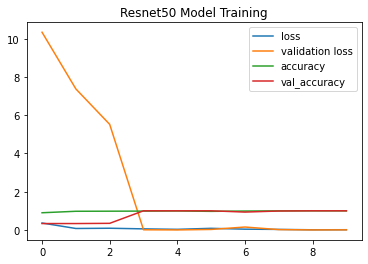

In [ ]:
resnet50 = ResNet50(include_top=False, input_shape=(64, 64, 3))

# Adding last layer into the resnet model
flat = Flatten()(resnet50.layers[-1].output)
# flat = Dense(1000, activation='relu')(flat)
# flat = Dense(100, activation='relu')(flat)
flat = Dense(10, activation='relu')(flat)
output = Dense(3, activation='softmax')(flat)

resnet50 = Model(inputs=resnet50.inputs, outputs=output)
resnet50.compile(optimizer = 'adam',
                    loss = 'categorical_crossentropy',
                    metrics=['accuracy'])

resnet50.summary()

model_epochs = 10

# Training the models
resnet50_history = resnet50.fit(np.array(X_train),
                y_train_cat, epochs = model_epochs,
                validation_data=(np.array(X_test), y_test_cat),
                batch_size=10)

plt.plot(range(model_epochs),resnet50_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),resnet50_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),resnet50_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),resnet50_history.history['val_accuracy'], label = "val_accuracy")
plt.title("Resnet50 Model Training")
plt.legend()
plt.show()

========== Resnet50 Classifier Results ==========

Accuracy on validation set: 0.9889

Classification report : 
               precision    recall  f1-score   support

        mask       1.00      0.97      0.98        30
   semi_mask       0.97      1.00      0.98        30
without_mask       1.00      1.00      1.00        30

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90


Confusion Matrix : 
 [[29  1  0]
 [ 0 30  0]
 [ 0  0 30]]


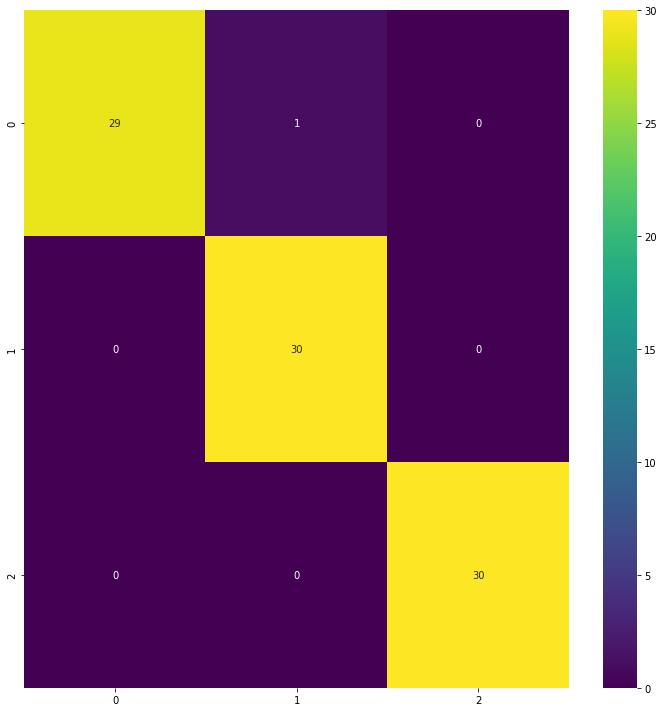

In [ ]:
predictions = [np.argmax(i) for i in resnet50.predict(np.array(X_test))]
y_actual = [np.argmax(i) for i in y_test_cat]
res50_result = modelEvaluation(pred, y_test, "Resnet50 Classifier Results")

# 5th Paper

### Information about paper
**Dataset Classes**
1. Masked
2. UnMasked

**Link**
https://www.kaggle.com/datasets/muhammeddalkran/masked-facerecognition

**Resnet Results**
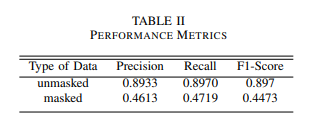

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

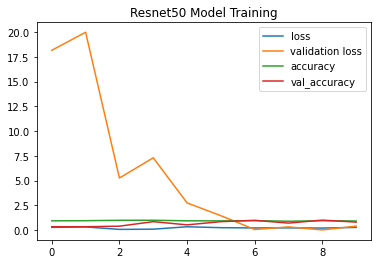

In [ ]:
resnet_model = ResNet50(include_top=False, input_shape=(64, 64, 3))

# Adding last layer into the vgg16 model
flat = Flatten()(resnet_model.layers[-1].output)
flat = Dense(100, activation='relu')(flat)
output = Dense(3, activation='softmax')(flat)
resnet_model = Model(inputs=resnet_model.inputs, outputs=output)
resnet_model.compile(optimizer = 'adam',
                    loss = 'categorical_crossentropy',
                    metrics=['accuracy'])

resnet_model.summary()

# Training the models
resnet_history = resnet_model.fit(np.array(X_train),
                y_train_cat,
                epochs = 10,
                validation_data=(np.array(X_test), y_test_cat),
                batch_size=10)

plt.plot(resnet_history.history['loss'], label = "loss")
plt.plot(resnet_history.history['val_loss'], label = "validation loss")
plt.plot(resnet_history.history['accuracy'], label = "accuracy")
plt.plot(resnet_history.history['val_accuracy'], label = "val_accuracy")
plt.title("Resnet50 Model Training")
plt.legend()
plt.show()

========== Resnet 50 ==========

Accuracy on validation set: 0.8000

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        30
           1       0.63      0.97      0.76        30
           2       0.95      0.63      0.76        30

    accuracy                           0.80        90
   macro avg       0.86      0.80      0.80        90
weighted avg       0.86      0.80      0.80        90


Confusion Matrix : 
 [[24  6  0]
 [ 0 29  1]
 [ 0 11 19]]


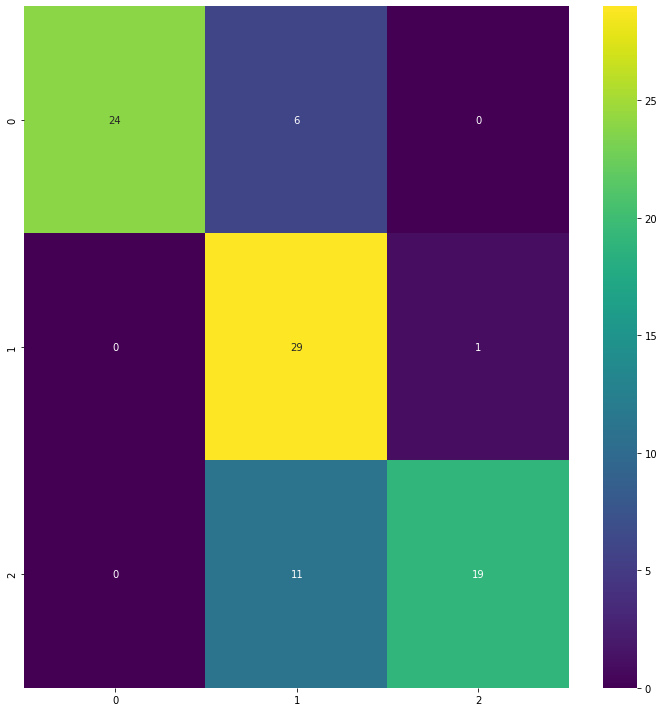

In [ ]:
predictions = [np.argmax(i) for i in resnet_model.predict(np.array(X_test))]
y_actual = [np.argmax(i) for i in y_test_cat]
resnet50_result = modelEvaluation(predictions, y_actual, "Resnet 50")

## Contribution

### Hyper parameter tuning

In [ ]:
results = {
    "optimizers":[],
    "Learning_rate":[],
    "Epochs":[],
    "Accuracy_Score":[]
}
for opt in [Adam, SGD]:
  for lr in [0.001, 0.0001]:
    for epoch in [10,15,20]:
      resnet_model = ResNet50(include_top=False, input_shape=(64, 64, 3))

      # Adding last layer into the vgg16 model
      flat = Flatten()(resnet_model.layers[-1].output)
      flat = Dense(100, activation='relu')(flat)
      output = Dense(3, activation='softmax')(flat)
      resnet_model = Model(inputs=resnet_model.inputs, outputs=output)
      resnet_model.compile(optimizer = opt(learning_rate= lr),
                          loss = 'categorical_crossentropy',
                          metrics=['accuracy'])

      # Training the models
      resnet_model.fit(np.array(X_train), y_train_cat, epochs = epoch, verbose=1, validation_data=(np.array(X_test), y_test_cat), batch_size=10)

      predictions = [np.argmax(i) for i in resnet_model.predict(np.array(X_test))]
      y_actual = [np.argmax(i) for i in y_test_cat]
      acc = accuracy_score(y_actual, predictions)
      
      results["Epochs"].append(epoch)
      results["optimizers"].append(opt)
      results["Learning_rate"].append(lr) 
      results["Accuracy_Score"].append(acc)

Epoch 1/10
270/270 [==============================] - 17s 45ms/step - loss: 0.3575 - accuracy: 0.9295 - val_loss: 10.0018 - val_accuracy: 0.3333
Epoch 2/10
270/270 [==============================] - 11s 41ms/step - loss: 0.2363 - accuracy: 0.9625 - val_loss: 502.6491 - val_accuracy: 0.3333
Epoch 3/10
270/270 [==============================] - 11s 41ms/step - loss: 0.4301 - accuracy: 0.9284 - val_loss: 0.2347 - val_accuracy: 0.9444
Epoch 4/10
270/270 [==============================] - 11s 41ms/step - loss: 0.0910 - accuracy: 0.9785 - val_loss: 0.1177 - val_accuracy: 0.9778
Epoch 5/10
270/270 [==============================] - 11s 41ms/step - loss: 0.1468 - accuracy: 0.9688 - val_loss: 0.6254 - val_accuracy: 0.8778
Epoch 6/10
270/270 [==============================] - 11s 41ms/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/10
270/270 [==============================] - 11s 41ms/step - loss: 0.0934 - accuracy: 0.9866 - val_loss: 0.1201 - val_accura

Epoch 1/15
270/270 [==============================] - 17s 44ms/step - loss: 0.3702 - accuracy: 0.8630 - val_loss: 36.7656 - val_accuracy: 0.3333
Epoch 2/15
270/270 [==============================] - 11s 41ms/step - loss: 0.0762 - accuracy: 0.9777 - val_loss: 6.9688 - val_accuracy: 0.3333
Epoch 3/15
270/270 [==============================] - 11s 41ms/step - loss: 0.0466 - accuracy: 0.9896 - val_loss: 0.5859 - val_accuracy: 0.7667
Epoch 4/15
270/270 [==============================] - 11s 41ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0783 - val_accuracy: 0.9667
Epoch 5/15
270/270 [==============================] - 11s 41ms/step - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 6/15
270/270 [==============================] - 11s 41ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0154 - val_accuracy: 0.9889
Epoch 7/15
270/270 [==============================] - 11s 42ms/step - loss: 0.0170 - accuracy: 0.9955 - val_loss: 0.0089 - val_accuracy

Epoch 1/20
270/270 [==============================] - 18s 45ms/step - loss: 0.4356 - accuracy: 0.8378 - val_loss: 62.4193 - val_accuracy: 0.3333
Epoch 2/20
270/270 [==============================] - 11s 41ms/step - loss: 0.0842 - accuracy: 0.9740 - val_loss: 12.1796 - val_accuracy: 0.3333
Epoch 3/20
270/270 [==============================] - 11s 41ms/step - loss: 0.0475 - accuracy: 0.9852 - val_loss: 1.2843 - val_accuracy: 0.5444
Epoch 4/20
270/270 [==============================] - 11s 41ms/step - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.0697 - val_accuracy: 0.9889
Epoch 5/20
270/270 [==============================] - 11s 40ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.0163 - val_accuracy: 0.9889
Epoch 6/20
270/270 [==============================] - 11s 40ms/step - loss: 0.0164 - accuracy: 0.9959 - val_loss: 0.0388 - val_accuracy: 0.9778
Epoch 7/20
270/270 [==============================] - 11s 40ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0589 - val_accurac

In [ ]:
pd.DataFrame(results)

,optimizers,Learning_rate,Epochs,Accuracy_Score
0,<class 'keras.optimizer_v2.adam.Adam'>,0.0010,10,1.000000
1,<class 'keras.optimizer_v2.adam.Adam'>,0.0010,15,1.000000
2,<class 'keras.optimizer_v2.adam.Adam'>,0.0010,20,0.988889
3,<class 'keras.optimizer_v2.adam.Adam'>,0.0001,10,0.977778
4,<class 'keras.optimizer_v2.adam.Adam'>,0.0001,15,1.000000
5,<class 'keras.optimizer_v2.adam.Adam'>,0.0001,20,1.000000
6,<class 'keras.optimizer_v2.gradient_descent.SGD'>,0.0010,10,0.988889
7,<class 'keras.optimizer_v2.gradient_descent.SGD'>,0.0010,15,0.988889
8,<class 'keras.optimizer_v2.gradient_descent.SGD'>,0.0010,20,0.988889
9,<class 'keras.optimizer_v2.gradient_descent.SGD'>,0.0001,10,0.933333
